In [1]:
import sys
sys.path.append("../../")

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import polars as pl
from functions.eda import *
from functions.cat_eda import *
from functions.num_eda import *

In [3]:
data=pl.read_csv("errorAnalysed.csv").drop("index")
data.head()

curbweight,cylindernumber,carvolume,enginepower,averagempg,price
i64,i64,f64,f64,f64,f64
2548,0,528019.904,4.6132e6,23.7,13495.0
2548,0,528019.904,4.6132e6,23.7,16500.0
2823,1,587592.64,4.4555e6,22.15,16500.0
2337,0,634816.956,3.8413e6,26.7,13950.0
2824,1,636734.832,4.9171e6,19.8,17450.0


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import KFold,cross_val_score,cross_val_predict,train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error,r2_score
X=data.drop('price').to_pandas()
y=data['price'].to_pandas()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

Mean Absolute Error: 1826.067250074687
R-squared: 0.9050378448122721


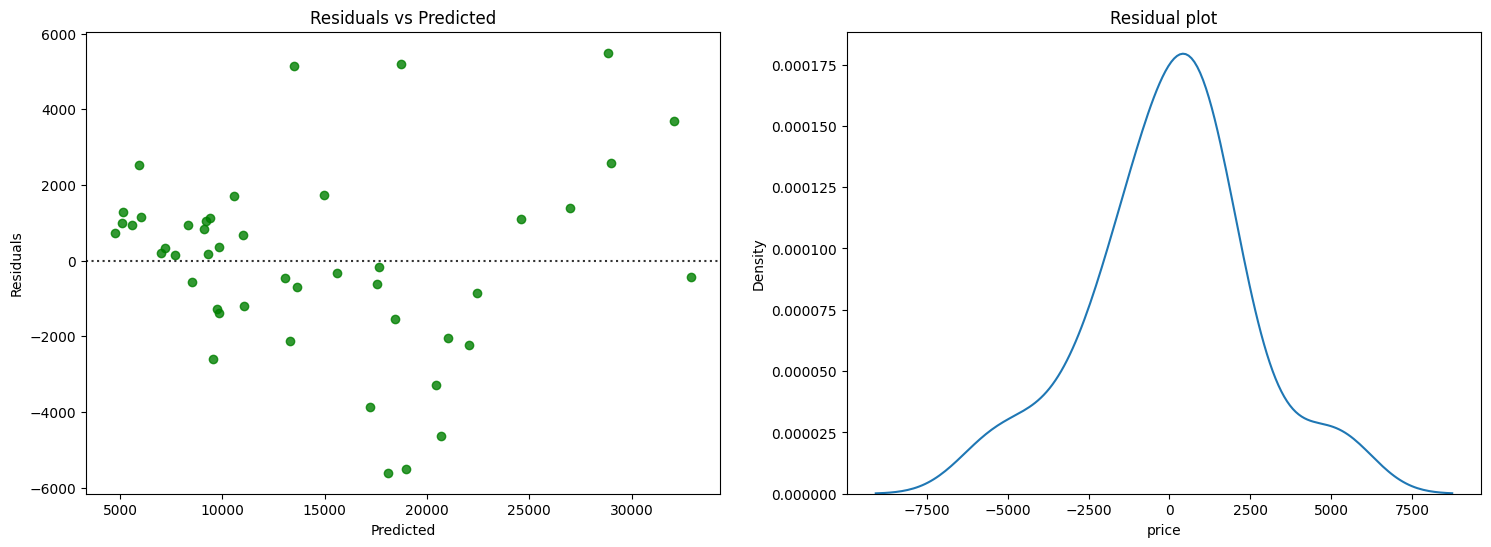

In [24]:
lasso_pipe = Pipeline([
    ('scaler', RobustScaler()),
    ('regressor', Lasso())
])
kf = KFold(n_splits=3)
param_grid = {'regressor__alpha': np.logspace(-3, 3, 100)}

grid_search = GridSearchCV(lasso_pipe, param_grid, cv=kf)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['regressor__alpha']

lasso_pipe.set_params(regressor__alpha=best_alpha)

cv_scores = cross_val_score(lasso_pipe, X_train, y_train, cv=kf)

predictions = cross_val_predict(lasso_pipe, X_test, y_test, cv=kf)
residuals = y_test - predictions
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
# Plotting residuals
fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(18, 6))
sns.residplot(x=predictions, y=residuals, color='g', ax=ax1)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Predicted')
sns.kdeplot(residuals, ax=ax2)
ax2.set_title("Residual plot")
plt.show()

Mean Absolute Error: 1812.5083204341338
R-squared: 0.9063186946881961


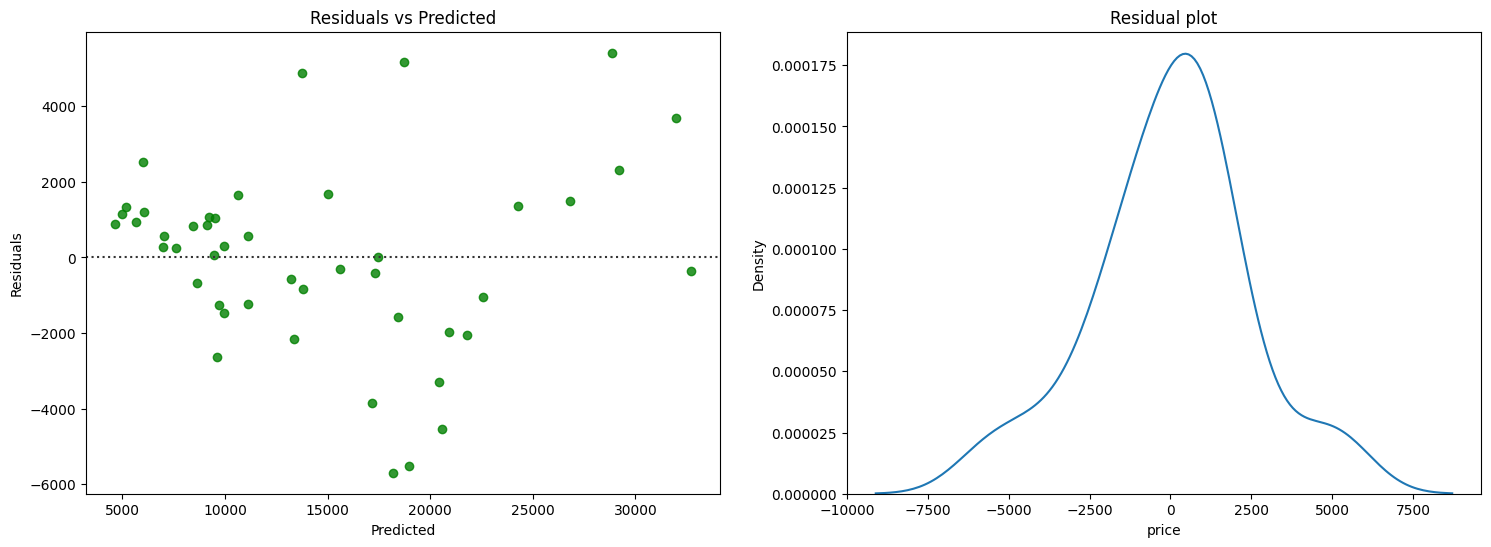

In [25]:
ridge_pipe = Pipeline([
    ('scaler', RobustScaler()),
    ('regressor', Ridge())
])
kf = KFold(n_splits=3)
param_grid = {'regressor__alpha': np.logspace(-3, 3, 100)}

grid_search = GridSearchCV(ridge_pipe, param_grid, cv=kf)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['regressor__alpha']

ridge_pipe.set_params(regressor__alpha=best_alpha)

cv_scores = cross_val_score(ridge_pipe, X_train, y_train, cv=kf)

predictions = cross_val_predict(ridge_pipe, X_test, y_test, cv=kf)
residuals = y_test - predictions
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
# Plotting residuals
fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(18, 6))
sns.residplot(x=predictions, y=residuals, color='g', ax=ax1)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Predicted')
sns.kdeplot(residuals, ax=ax2)
ax2.set_title("Residual plot")
plt.show()